<a href="https://colab.research.google.com/github/manbradcalf/CoLab-Random/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instantiate our nn.Module
        # fc = fully connected
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        # rectified linear unit
        # says "ok do something, if the output is < 0, use 0, else, pass"
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [27]:
torch.manual_seed(17)
model=Model()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

# change last col from str to int
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

my_df

/tmp/ipython-input-3391980684.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [30]:
# Train Test Split! Set X, Y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [31]:
# convert to numpy arrays
X = X.values
y = y.values
print("X",X)
print("y",y)

X [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=41)

In [34]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [35]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of epochs, lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [37]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [38]:
# Train Model
# Epochs? (one run thru all training data)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error
  loss = criterion(y_pred,y_train) # predicted vs training data
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # back propagation: take error rate of forward propagation
  # and feed it back thru the network to fine tune the rates
  # Use "The Benefit of Hindsight" to improve our model
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 Loss: 1.1156600713729858
Epoch: 10 Loss: 1.0530450344085693
Epoch: 20 Loss: 0.9382027387619019
Epoch: 30 Loss: 0.7889731526374817
Epoch: 40 Loss: 0.6411494016647339
Epoch: 50 Loss: 0.5387887954711914
Epoch: 60 Loss: 0.4717090427875519
Epoch: 70 Loss: 0.42402446269989014
Epoch: 80 Loss: 0.3779560327529907
Epoch: 90 Loss: 0.3274472653865814


Text(0.5, 0, 'epoch')

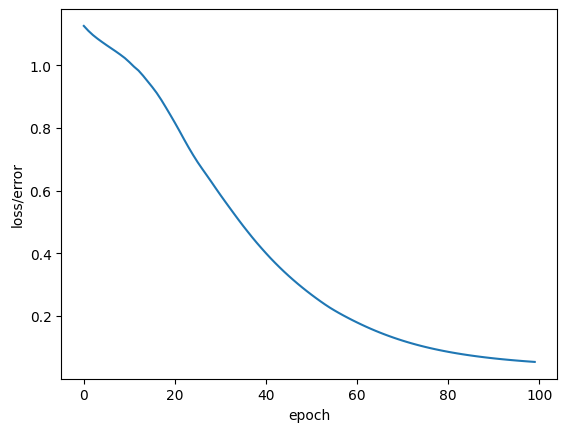

In [15]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [44]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): #basically turns off back prop
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test)
loss


tensor(0.3065)

In [45]:
correct = 0
with torch.no_grad():
  # enumerate thru test features
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # if y_test[i] == 0:
    #   x="Setosa"
    # elif y_test[i] == 1:
    #   x="Versicolor"
    # else:
    #   x="Virginica"

    print(f'{i+1}. {str(y_val)} \t{y_test[i]}\t{y_val.argmax().item()}')

    # correct or not
    # y_val.argmax() tells us the prediction, the max val of the output tensor Y
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)}')

1. tensor([-4.2648,  1.5417,  2.3523]) 	2	2
2. tensor([-5.2491,  1.5511,  3.0236]) 	2	2
3. tensor([-5.9103,  1.5573,  3.4745]) 	2	2
4. tensor([-2.6027,  1.5260,  1.2189]) 	1	1
5. tensor([-4.7785,  1.5466,  2.7027]) 	2	2
6. tensor([-1.5715,  1.5162,  0.5156]) 	1	1
7. tensor([-3.7761,  1.5371,  2.0190]) 	2	2
8. tensor([-2.2087,  1.5223,  0.9501]) 	1	1
9. tensor([-4.1819,  1.5410,  2.2958]) 	2	2
10. tensor([-5.5149,  1.5536,  3.2049]) 	2	2
11. tensor([-3.5195,  1.5347,  1.8441]) 	2	2
12. tensor([ 2.3705, -1.4410, -2.1609]) 	0	0
13. tensor([ 2.3705, -1.4410, -2.1609]) 	0	0
14. tensor([-0.5089,  0.8871, -0.2175]) 	1	1
15. tensor([ 2.3705, -1.4410, -2.1609]) 	0	0
16. tensor([-3.7991,  1.5373,  2.0348]) 	2	2
17. tensor([ 2.3705, -1.4410, -2.1609]) 	0	0
18. tensor([-4.0459,  1.5397,  2.2031]) 	1	2
19. tensor([ 2.3705, -1.4410, -2.1609]) 	0	0
20. tensor([ 2.3705, -1.4410, -2.1609]) 	0	0
21. tensor([-1.2059,  1.4391,  0.2542]) 	1	1
22. tensor([-5.1134,  1.5498,  2.9311]) 	2	2
23. tensor([ 2.3705